In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/EmailSpam.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data=pd.read_csv('EmailSpam.csv')
data.head(10)

,Unnamed: 0,text,inappropriate
0,0,"Бедный Ниссон, его бесконечных детей то похища...",0.9526
1,1,Ликвидация склада видео региcтраторов на сиcтe...,0.9800
2,2,Не знаю сам почему её туда отправили. Не торга...,0.0217
3,3,СУПЕРСКИДКИ! ШОРТЫ от 449 МАЙКИ!,0.9800
4,4,Активируй свой сертификат на льготное обучение!,0.9800
5,5,Бесплатная кредитная карта 180,0.9800
6,6,"Если не предусмотрели иных способов, то никак.",0.0001
7,7,"Поясните за это, в главных ролях уродливые сил...",0.9998
8,8,Реклама https://telegraph/ReklamaSPAOIngosstra...,0.9800
9,9,И от спорта ничего не осталось. Одна политика ...,0.0001


In [ ]:
data.columns

Index(['Unnamed: 0', 'text', 'inappropriate', 'Spam'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124597 entries, 0 to 124596
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     124597 non-null  int64  
 1   text           124597 non-null  object 
 2   inappropriate  124597 non-null  float64
 3   Spam           124597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
text,0
inappropriate,0
Spam,0


In [ ]:
data['Spam']=data['inappropriate'].apply(lambda x:1 if x>0.4 else 0)
data.head(5)

,Unnamed: 0,text,inappropriate,Spam
0,0,"Бедный Ниссон, его бесконечных детей то похища...",0.9526,1
1,1,Ликвидация склада видео региcтраторов на сиcтe...,0.9800,1
2,2,Не знаю сам почему её туда отправили. Не торга...,0.0217,0
3,3,СУПЕРСКИДКИ! ШОРТЫ от 449 МАЙКИ!,0.9800,1
4,4,Активируй свой сертификат на льготное обучение!,0.9800,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.text,data.Spam,test_size=0.25)
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
clf.score(X_test,y_test)

0.7934510433386838

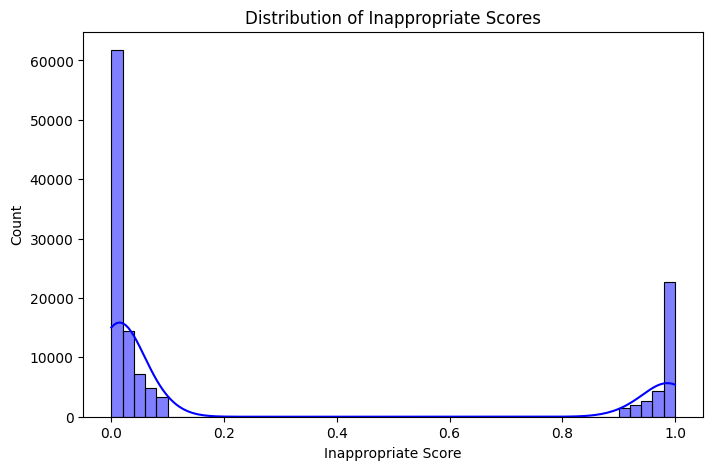

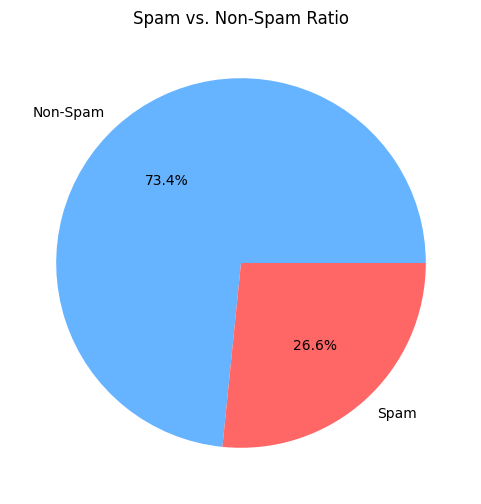

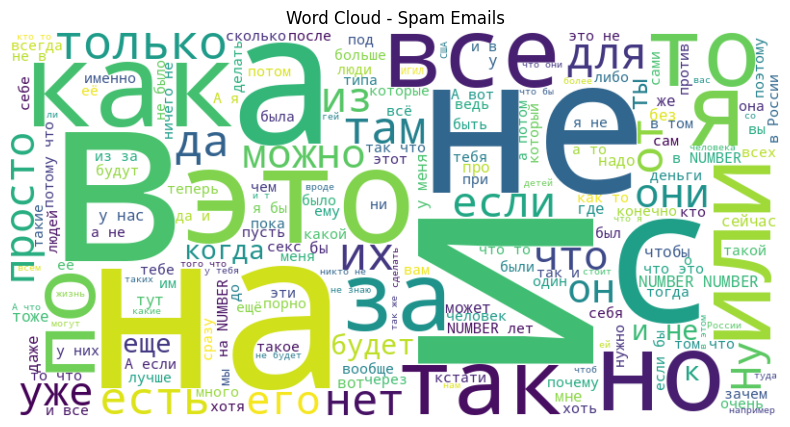

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Load dataset
file_path = "EmailSpam.csv"
df = pd.read_csv(file_path, quotechar='"', on_bad_lines='skip', low_memory=False)

# Drop unnecessary index column
df = df.drop(columns=["Unnamed: 0"])

# 1. Distribution of inappropriate scores
plt.figure(figsize=(8,5))
sns.histplot(df["inappropriate"], bins=50, kde=True, color="blue")
plt.title("Distribution of Inappropriate Scores")
plt.xlabel("Inappropriate Score")
plt.ylabel("Count")
plt.show()

# 2. Spam vs. Non-Spam Ratio (threshold = 0.5)
df["spam_label"] = (df["inappropriate"] >= 0.5).astype(int)

plt.figure(figsize=(6,6))
df["spam_label"].value_counts().plot.pie(
    autopct="%1.1f%%", labels=["Non-Spam","Spam"], colors=["#66b3ff","#ff6666"]
)
plt.title("Spam vs. Non-Spam Ratio")
plt.ylabel("")
plt.show()

# 3. Word Cloud for Spam Emails
spam_text = " ".join(df[df["spam_label"]==1]["text"].astype(str).tolist())
spam_wc = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color="white").generate(spam_text)

plt.figure(figsize=(10,5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Spam Emails")
plt.show()

# 4. Word Cloud for Non-Spam Emails
ham_text = " ".join(df[df["spam_label"]==0]["text"].astype(str).tolist())
ham_wc = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color="white").generate(ham_text)

plt.figure(figsize=(10,5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Non-Spam Emails")
plt.show()

# 5. Top 20 Most Frequent Words in Spam Emails
from collections import Counter
import re

def get_top_words(texts, n=20):
    words = []
    for t in texts:
        words.extend(re.findall(r"\b\w+\b", t.lower()))
    stopwords = set(STOPWORDS)
    filtered = [w for w in words if w not in stopwords and len(w) > 2]
    return Counter(filtered).most_common(n)

top_spam_words = get_top_words(df[df["spam_label"]==1]["text"].astype(str))

# Plot bar chart
words, counts = zip(*top_spam_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette="Reds_r")
plt.title("Top 20 Words in Spam Emails")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()